![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 10)



## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [60]:
beers = pd.read_csv("../6-Beers/data/datasets_beers.csv")
print("Primeros registros \n", beers.head())
print(f"Columnas: {len(beers.columns)}")
print(f"Dimensiones: {beers.ndim}")
beers.rename(columns={"id":"beer_id", "name":"beer_name"}, inplace=True)

Primeros registros 
    Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0  
Columnas: 8
Dimensiones: 2


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [61]:
beers.drop("Unnamed: 0", axis=1, inplace=True)


In [62]:
beers.sort_values(by="abv",ascending=False)

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces
2278,0.128,NaN,2565,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,19.2
70,0.125,80.0,2685,London Balling,English Barleywine,1,16.0
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0
2279,0.104,NaN,2564,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,19.2
1857,0.100,52.0,2574,4Beans,Baltic Porter,46,12.0
...,...,...,...,...,...,...,...
2186,NaN,NaN,121,Cornstalker Dark Wheat,American Dark Wheat Ale,282,12.0
2337,NaN,NaN,652,West Sixth IPA,American IPA,100,12.0
2345,NaN,NaN,2364,Royal Lager,American Pale Lager,132,16.0
2347,NaN,NaN,2344,O’Malley’s Stout,English Stout,132,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [63]:
beers.shape
print(f"filas: {len(beers.index)} \n"
      f"columnas: {len(beers.columns)}")

filas: 2410 
columnas: 7


## Ejercicio 5
¿De qué tipo son los datos?

In [64]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   beer_id     2410 non-null   int64  
 3   beer_name   2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [65]:
beers_numerics = beers.drop(["beer_id", "brewery_id"], axis=1)

In [66]:
beers_statistics = beers_numerics.describe()
beers_statistics

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [67]:
beers["style"].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
American Malt Liquor                1
Wheat Ale                           1
Flanders Red Ale                    1
Kristalweizen                       1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [68]:
#1
display(beers[10:21])

#2
display(beers.loc[10:21, "beer_name":"ounces"])
print("-------------------")
#3
display(beers.loc[10:21, ["abv","ibu","ounces"]])
#4
beers_series = round(beers.loc[10:21, ["abv","ibu","ounces"]], 3)
beers_array = np.array(beers_series)
print(beers_array)

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
...,...,...,...,...,...,...,...
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


,beer_name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
...,...,...,...,...
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0
20,He Said Belgian-Style Tripel,Tripel,368,12.0


-------------------


,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
...,...,...,...
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0
20,0.082,NaN,12.0


[[7.2e-02     nan 1.2e+01]
 [7.3e-02     nan 1.2e+01]
 [6.9e-02     nan 1.2e+01]
 [8.5e-02     nan 1.2e+01]
 [6.1e-02 6.0e+01 1.2e+01]
 [6.0e-02     nan 1.2e+01]
 [6.0e-02     nan 1.2e+01]
 [6.0e-02     nan 1.2e+01]
 [6.0e-02     nan 1.2e+01]
 [8.2e-02     nan 1.2e+01]
 [8.2e-02     nan 1.2e+01]
 [9.9e-02 9.2e+01 8.4e+00]]


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [69]:
beers_only = beers[(beers["style"] != "Cider") & (beers["style"] != "Other")]
beers_only["beer_name"] = beers_only[["beer_name"]].drop_duplicates()
print(f"todas las birras pesan: {round(beers_only.groupby("beer_name")["ounces"].sum().sum(), 2)}")

todas las birras pesan: 30790.9


/var/folders/d2/nwybmn31251d4d76_gyl2w740000gn/T/ipykernel_3104/1818314576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beers_only["beer_name"] = beers_only[["beer_name"]].drop_duplicates()


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [70]:
#beers_only["ibu"].fillna(round(beers_only["ibu"].mean(),2), inplace=True)

In [71]:
print(beers_only["ibu"].mean())
print(beers_only["ibu"].min())
print(beers_only["ibu"].max())

beers_only_name = beers_only.groupby("beer_name")

print(beers_only_name[["ibu"]].sum().idxmin())
print(beers_only_name[["ibu"]].sum().idxmax())

42.732193732193736
4.0
138.0
ibu    #001 Golden Amber Lager
dtype: object
ibu    Bitter Bitch Imperial IPA
dtype: object


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [72]:
print(beers_only["ibu"].mean())
print(beers_only["ibu"].median())
print(beers_only["ibu"].std())

42.732193732193736
35.0
25.953509958135633


Con una desviación estandar de 25,95, que con respecto a la media de 42,72 es bastante alto, podemos observar que hay una concentración de datos bastante dispersa. El hecho de que la media tambien sea bastante alta es que exista un sesgo positivo (mediana de 35.0), lo que significa que hay valores muy altos que estan sesgando esta metrica en concreto, contribuyendo a una mayor dispersión de los datos

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [74]:
beers_numerics.drop(["beer_name","style"], axis=1, inplace=True)

In [ ]:
beers_correlation = beers_numerics.corr()

<Axes: >

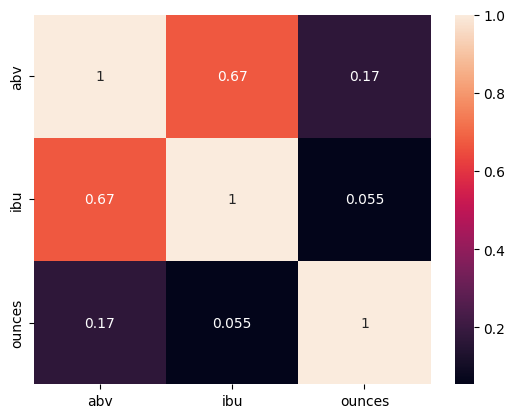

In [ ]:
sns.heatmap(beers_correlation, annot=True)

Podemos observar que hay una regresión lineal positiva entre abv e ibu, aunque esta no sea muy alta. En otro orden, el numero de onzas de una cerveza parece no correlacionarse con ninguna de las anteriores.

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: xlabel='abv', ylabel='Count'>

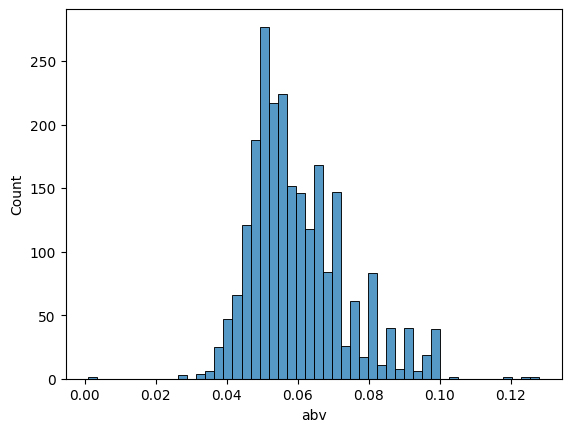

In [ ]:
sns.histplot(beers_numerics["abv"])

Este se trata de una distribución asimetrica, sesgada hacia la izquierda, ya que la graduación de alcohol tiende a ir a valores más bajos que la media

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<Axes: ylabel='abv'>

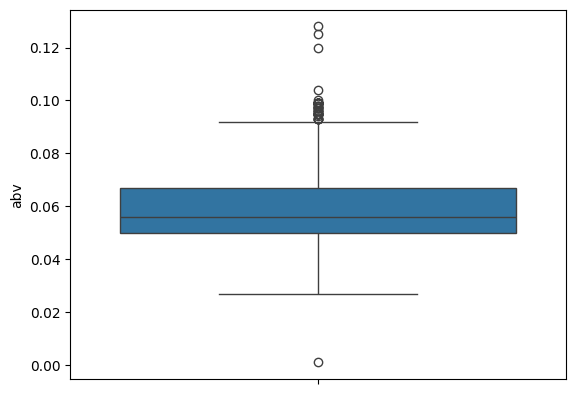

In [ ]:
sns.boxplot(beers_numerics["abv"])

Podemos observar que la mayoria de cervezas su graduación de alcohol comprende entre el 5% y 6%, con outliers de cervezas varias con una graduación de alcohol mayor. Tambien contamos con una cerveza sin alcohol.

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [ ]:
beers.groupby("style")["abv"].mean().sort_values(ascending=False).head(10)

style
English Barleywine                  0.107667
Quadrupel (Quad)                    0.104000
American Barleywine                 0.099000
American Malt Liquor                0.099000
Russian Imperial Stout              0.097636
American Double / Imperial Stout    0.093667
American Double / Imperial IPA      0.087369
Tripel                              0.086818
Baltic Porter                       0.085167
Belgian Strong Pale Ale             0.084000
Name: abv, dtype: float64

In [ ]:
beers.groupby("style")["ibu"].mean().sort_values(ascending=False).head(10)

style
American Barleywine                   96.000000
American Double / Imperial IPA        93.320000
Russian Imperial Stout                86.500000
American Double / Imperial Pilsner    85.000000
Belgian Strong Dark Ale               72.000000
American Black Ale                    68.900000
American IPA                          67.634551
English Barleywine                    66.666667
English Stout                         66.000000
American Strong Ale                   65.416667
Name: ibu, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [ ]:
breweries = pd.read_csv("../6-Beers/data/datasets_breweries.csv")
breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [ ]:
breweries.rename(columns={"Unnamed: 0":"brewery_id","name":"brewery_name"}, inplace=True)

## Ejercicio 18
Junta los dos datasets que tienes

In [ ]:
breweries_and_beers = pd.merge(breweries,beers)
breweries_and_beers

,brewery_id,brewery_name,city,state,abv,ibu,beer_id,beer_name,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [ ]:
print(breweries["state"].nunique())
print(breweries["city"].nunique())
print(breweries["brewery_name"].nunique())

51
384
551


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [ ]:
breweries_and_beers.groupby(["state","city"])[["abv"]].aggregate(["min","max", "mean"])

abv                 
                    min    max      mean
state city                              
AK    Anchorage   0.048  0.063  0.054200
      Juneau      0.053  0.053  0.053000
      Soldotna    0.050  0.068  0.058500
      Talkeetna   0.056  0.065  0.059500
AL    Birmingham  0.056  0.093  0.065400
...                 ...    ...       ...
WI    Wilson      0.055  0.055  0.055000
WV    Lewisburg   0.057  0.067  0.062000
WY    Jackson     0.050  0.068  0.054857
      Pinedale    0.050  0.072  0.061000
      Sheridan    0.046  0.070  0.052833

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [ ]:
indiana = breweries_and_beers["state"].str.contains("IN")
breweries_and_beers[indiana].groupby(["city"])[["beer_name","ibu"]].max().sort_values(by="ibu",ascending=False).head(5)


,beer_name,ibu
city,,
Evansville,Rivet Irish Red Ale,115.0
Michigan City,Wrath of Pele,115.0
Indianapolis,Whip Fight,104.0
Valparaiso,The Gadget,90.0
Lafayette,People's Pilsner,77.0


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [ ]:
breweries_and_beers.groupby("city")[["ibu"]].describe()

ibu                                                       \
               count        mean        std    min     25%    50%     75%   
city                                                                        
Abingdon         1.0  135.000000        NaN  135.0  135.00  135.0  135.00   
Abita Springs    3.0   27.333333  21.455380   13.0   15.00   17.0   34.50   
Ada              0.0         NaN        NaN    NaN     NaN    NaN     NaN   
Afton            4.0   43.000000  19.899749   22.0   28.00   45.0   60.00   
Airway Heights   0.0         NaN        NaN    NaN     NaN    NaN     NaN   
...              ...         ...        ...    ...     ...    ...     ...   
Woodinville      4.0   46.750000  18.643587   27.0   39.75   44.0   51.00   
Worcester        1.0   69.000000        NaN   69.0   69.00   69.0   69.00   
Yakima           2.0   54.000000  22.627417   38.0   46.00   54.0   62.00   
Yardley          0.0         NaN        NaN    NaN     NaN    NaN     NaN   
York             4.0   44.250000  22.779742   20.0   35.00   41.0   50.25   

                       
                  max  
city                   
Abingdon        135.0  
Abita Springs    52.0  
Ada               NaN  
Afton            60.0  
Airway Heights    NaN  
...               ...  
Woodinville      72.0  
Worcester        69.0  
Yakima           70.0  
Yardley           NaN  
York             75.0  

[384 rows x 8 columns]

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [ ]:
breweries_and_beers[breweries_and_beers["abv"] >= 0.07].groupby(["brewery_name","beer_name"])[["abv"]].max()

abv
brewery_name              beer_name                                  
18th Street Brewery       Black Exodus                          0.077
                          Cone Crusher                          0.086
                          Regional Ring Of Fire                 0.073
                          Rise of the Phoenix                   0.071
                          Sex and Candy                         0.075
...                                                               ...
Wingman Brewers           P-51 Porter                           0.080
Wisconsin Brewing Company #002 American I.P.A.                  0.071
Worthy Brewing Company    Lights Out Vanilla Cream Extra Stout  0.077
Wynkoop Brewing Company   Colorojo Imperial Red Ale             0.082
                          Rocky Mountain Oyster Stout           0.075

[493 rows x 1 columns]

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [ ]:
breweries_and_beers[breweries_and_beers["ibu"] > breweries_and_beers["ibu"].mean()].groupby(["beer_name","state"])[["ibu"]].mean().sort_values(by="state")

,,ibu
beer_name,state,
Fairweather IPA,AK,64.0
Mother Ale,AK,46.0
Single Engine Red,AK,46.0
Pleasure Town IPA,AK,61.0
Sockeye Red IPA,AK,70.0
Pleasure Town,AK,61.0
King Street IPA,AK,70.0
Chuli Stout,AK,55.0
Twister Creek India Pale Ale,AK,71.0
